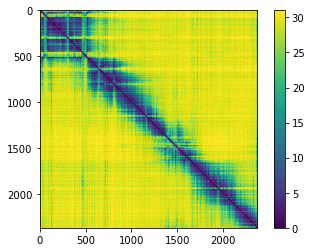

In [53]:
import json
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


with open('PAE/AF-A2RRP1-F1-predicted_aligned_error_v4.json', 'r') as f:
    pae_data = json.load(f)
    # Extract the data from each dictionary in the list
    data = [np.array(d['predicted_aligned_error']) for d in pae_data]

    # Concatenate the data along the first axis
    pae_matrix = np.concatenate(data, axis=0)

    # Plot the heatmap
    plt.imshow(pae_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.show()
    # plt.figure(figsize=(10, 10), dpi=300)
    plt.rcParams['figure.figsize'] = [10, 10]

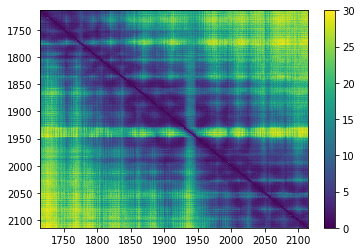

In [30]:
start_index = 1714
end_index = 2114
plt.imshow(pae_matrix[start_index:end_index+1, start_index:end_index+1], cmap='viridis', interpolation='nearest', extent=[start_index, end_index, end_index, start_index], aspect='auto')
plt.colorbar()
plt.show()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the file
with open("RMSD/NBAS_rmsd.txt") as f:
    lines = f.readlines()

# Create a dataframe
df = pd.DataFrame({"number": range(1, 2372), "RMSD": 0})

# Iterate over the lines
for line in lines:
    # Split the line into a list
    line_list = line.split()

    # Get the position
    position_start = int(line_list[2].split(":")[0].split("at")[1])
    position_end = int(line_list[2].split(":")[0].split("-")[1])

    # Get the RMSD
    rmsd = float(line_list[2].split(":")[1])

    # Add the RMSD to the dataframe
    for position in range(position_start, position_end + 1):
        df.loc[position, "RMSD"] = max(df.loc[position, "RMSD"], rmsd)

# Plot the graph
plt.plot(df["number"], df["RMSD"])
plt.xlabel("Position")
plt.ylabel("RMSD")
plt.show()


IndexError: list index out of range

['RMSD', 'at', 'position', '54-154', '-', '14.760867305627626']
['RMSD', 'at', 'position', '104-204', '-', '0.3670512446675756']
['RMSD', 'at', 'position', '154-254', '-', '0.512086181508059']
['RMSD', 'at', 'position', '204-304', '-', '4.513654941851311']
['RMSD', 'at', 'position', '254-354', '-', '4.805327130215812']
['RMSD', 'at', 'position', '304-404', '-', '1.8859463205705391']
['RMSD', 'at', 'position', '354-454', '-', '3.032257572488997']
['RMSD', 'at', 'position', '1714-1814', '-', '0.4764080808701663']
['RMSD', 'at', 'position', '1764-1864', '-', '0.4651409115256048']
['RMSD', 'at', 'position', '1814-1914', '-', '0.7440163511759728']
['RMSD', 'at', 'position', '1864-1964', '-', '0.5691716553900018']
['RMSD', 'at', 'position', '1914-2014', '-', '2.492117264204289']
['RMSD', 'at', 'position', '1964-2064', '-', '0.7169187896469925']
['RMSD', 'at', 'position', '2014-2114', '-', '0.19733458513628613']


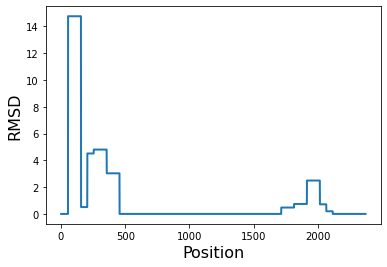

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Read the file
with open("RMSD/NBA_rmsd_log.txt") as f:
    lines = f.readlines()

# Create a dataframe
df = pd.DataFrame({"number": range(1, 2372), "RMSD": 0})

# Iterate over the lines
for line in lines:
    if line.startswith("+"):
        continue
    
    # Split the line into a list
    line_list = line.split()
    print(line_list)
    # Get the position
    position_start = int(line_list[3].split("-")[0])
    position_end = int(re.sub("[^0-9]", "", line_list[3].split("-")[1]))
    
    # print(position_start, position_end, line_list)
        
    # Get the RMSD
    rmsd = float(line_list[5])
    
    # print(rmsd)
    
    # Add the RMSD to the dataframe
    for position in range(position_start, position_end + 1):
        df.loc[position, "RMSD"] = max(df.loc[position, "RMSD"], rmsd)

# Plot the graph
plt.plot(df["number"], df["RMSD"], linewidth=2, markersize=10)
plt.xlabel("Position", fontsize=16)
plt.ylabel("RMSD", fontsize=16)
plt.show()
